# <center><strong>Important:</strong> Make a Copy of this Google Colab Notebook!
</center>

<p>Please refrain from using or modifying this current Google Colab notebook directly. Instead, follow these instructions to create your own copy:</p>

<ol>
  <li>Go to the "File" menu at the top of the Colab interface.</li>
  <li>Select "Save a copy in Drive" to create a duplicate of this notebook.</li>
  <li>You can now work on your own copy without affecting the original.</li>
</ol>

<p>This ensures that you have a personalized version to work on and make changes according to your needs. Remember to save your progress as you go. Enjoy working on your own copy of the Google Colab notebook!</p>

# **Module 22 Using Built-In SVM Functions**
In this module, you will learn to apply Python built-in SVM functions for the same binary classfication task from scikit-learn. The goal is to help you become familiar with these pre-existing functions and tools within Python. This module is divided into two examples:

*   Example 1: SVM with a randomly generated dataset
*   Example 2: SVM with a real dataset

In Example 1, we will be generating a random dataset in order to visualize the results from the SVM algorithm. In Example 2, we will be using the same dataset as in Module 21.

## **Getting Started**

Run the provided code sections and follow the instructions.

##**Importing Python Packages**
The first step is to import your necessary Python packages.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.inspection import DecisionBoundaryDisplay

## **Example 1: SVM with a Randomly Generated Dataset**

We'll start with a simple example of SVM using a randomly generated dataset to better visualize the output of the algorithm. To follow the modules from last week, we will focus on examples that are linearly separable.

### **Generate a random dataset**

Using the built-in function `datasets.make_blobs` from Scikit-learn, we can generate a non-linearly separable dataset. This function is designed for generating a synthetic two-dimensional classification dataset shaped like two interleaving half circles, hence the name "moons". The input parameters for the function include

*   `n_samples`: The total number of points to generate. It is the sum of the samples in both moon shapes.
*   `n_features`: The number of features for each sample. By default, it is set to 2.
*   `centers`: The number of centers to generate or the coordinates of the centers.
*   `cluster_std`: The standard deviation of the clusters. If a single float is provided, it is used for all clusters. If a sequence of floats is provided, it assigns different standard deviations to each cluster.
*   `random_state`: Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls.

The outputs include `X` which are the generated samples, and `y` which are the labels for each sample.

Here we will generate a dataset will 500 samples in two blobs that will overlap because of the `cluster_std` of 3.0.

In [ ]:
X, y = datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=3.0, random_state=42)

We can visualize the data using Matplotlib as follows. We will see that these data are not lineraly separable which means that it will be impossible to achieve 100% accuracy from our SVM algorithm.

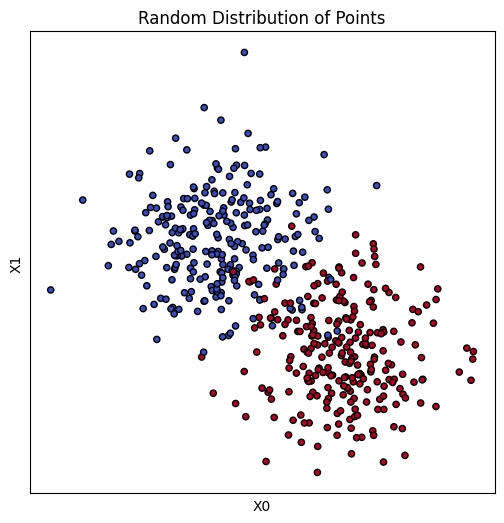

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_ylabel('X1')
ax.set_xlabel('X0')
ax.set_xticks(())
ax.set_yticks(())
ax.scatter(X[:,0], X[:,1], s=20, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
ax.set_title('Random Distribution of Points')
plt.show()

Now we have a random dataset! Let's use the SVM algorithm to attempt to separate the blue and red dots.

### **Splitting the Dataset**

Next, we need to split the dataset into our training and testing datasets. This is necessary since we need to retain a testing dataset to see how the model will perform on unseen observations. To split the dataset, we'll use the function `train_test_split()` from sklearn.model_selection. The function takes in the following:
*   `X`: The feature data, typically represented as a NumPy array or pandas DataFrame.
*   `y`: The target variable or label data, corresponding to the feature data.
*   `test_size`: The proportion (between 0.0 and 1.0) of the dataset to include in the test split. For example, `test_size=0.3` would create a test set comprising 30% of the total data, while the remaining 70% is allocated to the training set.
*   `random_state`: The seed value used for random shuffling and splitting of the dataset. Setting a specific random_state ensures reproducibility of the split. If random_state is not provided, the data will be split differently each time the function is called.

The `train_test_split()` function returns four subsets:
*   `X_train`: The training set of feature data.
*   `X_test`: The test set of feature data.
*   `y_train`: The corresponding target variable for the training set.
*   `y_test`: The corresponding target variable for the test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

### **Training the Model**

Now that we have our training and testing datasets, we can run the SVM algorithm using the bulit in functions from scikit-learn. The model we are using is the `svm.SVC` function where SVC stands for support vector classification. The inputs to the fuction that we will focus on are `kernel` and `C`.

*   kernel: Specifies the kernel type to be used in the SVM algorithm. Common choices include 'linear', 'poly', 'rbf' (Radial Basis Function), 'sigmoid', and more. The default is 'rbf'.
*   C: Penalty parameter C of the error term. It controls the trade-off between maximizing the margin and minimizing the classification errors. Higher values of C prioritize correct classification of training examples, potentially leading to overfitting. The default value is 1.0.

We are going to focus on using a linear kernel since we want to linearly separate the data. However, we can adjust the value for the regularization strength, `C`.

We will also be using the function `svm.SVC.fit` which trains the SVM model on the given training data `X_train` and corresponding labels `y_train`. Since we set the output of `svm.SVC` to be `model`, we can call this function as `model.fit`.


In [ ]:
reg_strength = 1000 # set the regularization strength, C
model = svm.SVC(kernel='linear', C=reg_strength)
clf = model.fit(X_train, y_train)

### **Testing the Model**

Now we can use the SVM model in order to predict the labels on the testing dataset. This is done using the `svm.SVC.predict` function which we are calling as `model.predict`. The input to this function is the testing data and the output is the predicted labels from the SVM algorithm.

Additionally, we can compute three metrics to describe the results of the prediction. In this case, we are using the accuracy, precision, and recall.

*   **Precision**: Precision is a measure of the model's ability to correctly identify positive instances (true positives) out of all instances predicted as positive. It is calculated as the ratio of true positives (TP) to the sum of true positives and false positives (FP).
*   **Recall (Sensitivity or True Positive Rate)**: Recall measures the ability of the model to correctly identify positive instances (true positives) out of all actual positive instances. It is calculated as the ratio of true positives (TP) to the sum of true positives and false negatives (FN).
*   **Accuracy**: Accuracy measures the overall correctness of the model's predictions. It calculates the ratio of the number of correct predictions (true positives and true negatives) to the total number of instances. Accuracy provides an overall measure of the model's performance, considering both positive and negative predictions. However, accuracy alone may not be sufficient if the dataset is imbalanced (i.e., when the number of instances in one class is much higher than the other), as the model may achieve high accuracy by simply predicting the majority class.





In [ ]:
y_pred = model.predict(X_test)

print("Accuracy on test dataset:",metrics.accuracy_score(y_test, y_pred))
print("Precision on test dataset:",metrics.precision_score(y_test, y_pred))
print("Recall on test dataset:",metrics.recall_score(y_test, y_pred))

Accuracy on test dataset: 0.9733333333333334
Precision on test dataset: 0.975
Recall on test dataset: 0.975


We can also plot the results of the model and display the decision boundary. To do this we will write two additional functions: `make_meshgrid` and `plot_contours`. We can use these functions to overlay the decision boundary on the scatter plot of the points as follows.

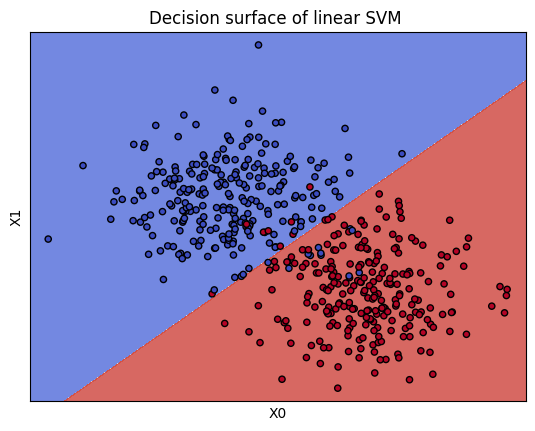

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('X1')
ax.set_xlabel('X0')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decision surface of linear SVM ')
plt.show()

We can see from the above plot that the decision boundary separates the distribution of red and blue points.

## **Example 2: SVM with a Real Dataset**

Now let's apply the same built-in SVM functions on a real dataset. In this case, we'll use the same dataset as Module 21.

### **Loading and Inspecting the Dataset**

First, we will load and inspect a dataset from scikit-learn. This dataset contains information about breast cancer tumors from digitized images of fine needle aspirates (FNA) of breast masses. This is a commonly used dataset for binary classification tasks, where the objective is to predict whether a tumor is malignant (cancerous) or benign (non-cancerous).

Within the dataset, there are 30 numerical features including the mean, standard error, and worst (largest) values of attributes such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

The target variable represents the diagnosis of the tumor and is encoded as follows:
*   0: Malignant (indicating the presence of cancer)
*   1: Benign (indicating the absence of cancer)

In [ ]:
cancer = datasets.load_breast_cancer()

We can inspect the dataset by first displaying the features and targets within the datset. The features are the 30 numerical features that describe the breast masses that were imaged. The labels are the diagnosis of either malignant or benign. We can additionally output the size of the dataset to see the number of samples.

In [ ]:
# print the names of the features:
print("Features: ", cancer.feature_names)

# print the label type of cancer:
print("Labels: ", cancer.target_names)

# print the size of the dataset:
print("Size of dataset: ",cancer.data.shape)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']
Size of dataset:  (569, 30)


To further evaluate the dataset, we can output the mean and the minimum values for the columns to ensure the data are loaded in correctly. In the case of this dataset, this means inspecting the minumum values and ensuring they are all greater than zero for the feature that are a metric of distance. There are additional metrics we could use based on the dataset and when implementing algorithms in your research or coursework you should always consider which summary statistics are most important to your dataset.

In [ ]:
# Calculate mean by columns
mean = np.mean(cancer.data, axis=0)

# Calculate minimum by columns
minimum = np.min(cancer.data, axis=0)

# Print the summary statistics
print("Mean:", mean)
print("Minimum:", minimum)

Mean: [1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
Minimum: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]


Now that we know the dataset has been correctly loaded, we can continue on to implementing the SVM algorithm.

### **Splitting the Dataset**

Next, we need to split the dataset into our training and testing datasets. We will do this using the same `test_train_split` function as earlier in this Colab notebook.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=42)

### **Generating and Training the Model**

Again following the same methods as before, we can use the `svm.SVC` functions to train and test a linear SVM classifier for the tumor dataset.

In [ ]:
#Create a svm Classifier
reg_strength_example2 = 1000
tumor_model = svm.SVC(kernel='linear',C=reg_strength_example2)

#Train the model using the training sets
tumor_model.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

### **Testing the Model**

Finally, we can test the model as before using `predict` in order to predict the diagnosis labels based on the information about breast cancer tumors from digitized images of fine needle aspirates (FNA) of breast masses. We will again use the same accuracy, precision, and recall metrics to evaluate the results of this model.

In [ ]:
#Predict the response for test dataset
y_pred = tumor_model.predict(X_test)

print("Accuracy on test dataset:",metrics.accuracy_score(y_test, y_pred))
print("Precision on test dataset:",metrics.precision_score(y_test, y_pred))
print("Recall on test dataset:",metrics.recall_score(y_test, y_pred))

Accuracy on test dataset: 0.9473684210526315
Precision on test dataset: 0.9714285714285714
Recall on test dataset: 0.9444444444444444


### **Adjusting Parameters**

Now let's make some adjustments to the parameter `reg_strength` to see the impact on the accuracy, recall, and precision.

*   What happens when you increase or decrease the regularization strength in Example 1? What about in Example 2?
*   What happens to the training time when you increase the regularization strength?
*   Visualize the differences in the regularization strength using the plot in Example 1.
*   What happens when you increase or decrease the number of samples in Example 1?

✅ **Discuss the changes in accuracy, precision, and recall on Piazza or Discord with your fellow classmates!**


## ✨ **Congratulations you have now coded the SVM algorithm using scikit-learn!** ✨

These examples were based on the following resources:

*    https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
*    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
*    https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85